In [1]:
import os
import sys
import geopandas as gpd
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from importlib import reload

In [2]:
sys.path.append("..")

In [3]:
from laptop import vis
from laptop import main

In [20]:
reload(vis)

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:92: SyntaxWarning: invalid escape sequence '\d'
  df['LCZ_number'] = df['LCZ'].str.extract('(\d+)').astype(int)


<module 'laptop.vis' from '/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py'>

In [5]:
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']
temp = temp[temp['data_type'] == 'observed']

In [6]:
temp

datetime_UTC station_id  variable  value data_type
1      2022-09-01 00:00:00+00:00     FRBETZ  Ta_deg_C  16.85  observed
2      2022-09-01 00:00:00+00:00     FRBRUH  Ta_deg_C  16.33  observed
3      2022-09-01 00:00:00+00:00     FRDIET  Ta_deg_C  13.98  observed
4      2022-09-01 00:00:00+00:00     FRDREI  Ta_deg_C  16.61  observed
6      2022-09-01 00:00:00+00:00     FREICH  Ta_deg_C  13.79  observed
...                          ...        ...       ...    ...       ...
359442 2023-09-01 06:00:00+00:00     FRWEIN  Ta_deg_C  19.02  observed
359443 2023-09-01 06:00:00+00:00     FRWILD  Ta_deg_C  18.68  observed
359444 2023-09-01 06:00:00+00:00     FRWITT  Ta_deg_C  17.59  observed
359445 2023-09-01 06:00:00+00:00     FRWSEE  Ta_deg_C  18.80  observed
359446 2023-09-01 06:00:00+00:00     FRZAHR  Ta_deg_C  18.43  observed

[348130 rows x 5 columns]

In [7]:
prec23 = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/FRCHEM_2023_Precipitation_Daily_UTC.csv')
prec22 = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/FRCHEM_2022_Precipitation_Daily_UTC.csv')
# concat prec22 and prec23
prec = pd.concat([prec22, prec23])
prec['datetime_UTC'] = pd.to_datetime(prec['YYYYMMDDHHMM_From'], format='%Y%m%d%H%M', utc=True)
prec['Precipitation_Sum_mm_day_before'] = prec['Precipitation_Sum_mm'].shift(1)
no_prec = prec[(prec['datetime_UTC'].dt.date.isin(temp['datetime_UTC'].dt.date)) & (prec['Precipitation_Sum_mm'] == 0) & (prec['Precipitation_Sum_mm_day_before'] == 0)]['datetime_UTC'].dt.date
temp = temp[temp['datetime_UTC'].dt.date.isin(no_prec)]

In [8]:

no_prec = prec[(prec['datetime_UTC'].dt.date.isin(temp['datetime_UTC'].dt.date)) & (prec['Precipitation_Sum_mm'] == 0) & (prec['Precipitation_Sum_mm_day_before'] == 0)]['datetime_UTC'].dt.date
#heat_island_dates = heat_island_dates[heat_island_dates.dt.date.isin(no_prec)]

In [9]:
temp = temp[temp['datetime_UTC'].dt.date.isin(no_prec)]

In [10]:
temp

datetime_UTC station_id  variable  value data_type
985    2022-09-02 00:00:00+00:00     FRBETZ  Ta_deg_C  18.32  observed
986    2022-09-02 00:00:00+00:00     FRBRUH  Ta_deg_C  18.68  observed
987    2022-09-02 00:00:00+00:00     FRDIET  Ta_deg_C  17.43  observed
988    2022-09-02 00:00:00+00:00     FRDREI  Ta_deg_C  18.70  observed
990    2022-09-02 00:00:00+00:00     FREICH  Ta_deg_C  14.14  observed
...                          ...        ...       ...    ...       ...
351283 2023-08-23 23:00:00+00:00     FRWEIN  Ta_deg_C  22.70  observed
351284 2023-08-23 23:00:00+00:00     FRWILD  Ta_deg_C  20.00  observed
351285 2023-08-23 23:00:00+00:00     FRWITT  Ta_deg_C  22.97  observed
351286 2023-08-23 23:00:00+00:00     FRWSEE  Ta_deg_C  21.54  observed
351287 2023-08-23 23:00:00+00:00     FRZAHR  Ta_deg_C  21.66  observed

[137887 rows x 5 columns]

In [11]:

temp_w = temp[temp['datetime_UTC'].dt.month.isin([12,1,2])]
temp_wn = temp_w[temp_w['datetime_UTC'].dt.hour.isin([0,1,2,3,4,5,19,20,21,22,23])]
temp_wd = temp_w[temp_w['datetime_UTC'].dt.hour.isin([10,11,12,13,14,15,16])]
temp_sp = temp[temp['datetime_UTC'].dt.month.isin([3,4,5])]
temp_spn = temp_sp[temp_sp['datetime_UTC'].dt.hour.isin([0,1,2,3,4,5,19,20,21,22,23])]
temp_spd = temp_sp[temp_sp['datetime_UTC'].dt.hour.isin([10,11,12,13,14,15,16])]
temp_s = temp[temp['datetime_UTC'].dt.month.isin([6,7,8])]
temp_sn = temp_s[temp_s['datetime_UTC'].dt.hour.isin([0,1,2,3,4,22,23])]
temp_sd = temp_s[temp_s['datetime_UTC'].dt.hour.isin([10,11,12,13,14,15,16])]
temp_a = temp[temp['datetime_UTC'].dt.month.isin([9,10,11])]
temp_an = temp_a[temp_a['datetime_UTC'].dt.hour.isin([0,1,2,3,4,5,21,22,23])]
temp_ad = temp_a[temp_a['datetime_UTC'].dt.hour.isin([9,10,11,12,13,14,15,16])]

temp_n = temp[temp['datetime_UTC'].dt.hour.isin([0,1,2,3,4,22,23])]

temp_w['datetime_UTC'] = temp_w['datetime_UTC'].astype(str)
temp_wn['datetime_UTC'] = temp_wn['datetime_UTC'].astype(str)
temp_sp['datetime_UTC'] = temp_sp['datetime_UTC'].astype(str)
temp_spn['datetime_UTC'] = temp_spn['datetime_UTC'].astype(str)
temp_s['datetime_UTC'] = temp_s['datetime_UTC'].astype(str)
temp_sn['datetime_UTC'] = temp_sn['datetime_UTC'].astype(str)
temp_a['datetime_UTC'] = temp_a['datetime_UTC'].astype(str)
temp_an['datetime_UTC'] = temp_an['datetime_UTC'].astype(str)

temp_n['datetime_UTC'] = temp_n['datetime_UTC'].astype(str)

temp_w = temp_w.pivot(index='station_id', columns='datetime_UTC', values='value')
temp_wn = temp_wn.pivot(index='station_id', columns='datetime_UTC', values='value')
temp_sp = temp_sp.pivot(index='station_id', columns='datetime_UTC', values='value')
temp_spn = temp_spn.pivot(index='station_id', columns='datetime_UTC', values='value')
temp_s = temp_s.pivot(index='station_id', columns='datetime_UTC', values='value')
temp_sn = temp_sn.pivot(index='station_id', columns='datetime_UTC', values='value')
temp_a = temp_a.pivot(index='station_id', columns='datetime_UTC', values='value')
temp_an = temp_an.pivot(index='station_id', columns='datetime_UTC', values='value')

temp_n = temp_n.pivot(index='station_id', columns='datetime_UTC', values='value')

temp['datetime_UTC'] = temp['datetime_UTC'].astype(str)
temp = temp.pivot(index='station_id', columns='datetime_UTC', values='value')

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_14699/706588649.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_w['datetime_UTC'] = temp_w['datetime_UTC'].astype(str)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_14699/706588649.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_wn['datetime_UTC'] = temp_wn['datetime_UTC'].astype(str)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_14699/706588649.py:18: SettingWithCopyWarning: 
A value is trying to be set

In [12]:
hid = temp.loc[:, temp.std() > 2].columns.values
hiw = temp_w.loc[:, temp_w.std() > 2].columns.values
hiwn = temp_wn.loc[:, temp_wn.std() > 2].columns.values
his = temp_s.loc[:, temp_s.std() > 2].columns.values
hisn = temp_sn.loc[:, temp_s.std() > 2].columns.values
hia = temp_a.loc[:, temp_a.std() > 2].columns.values
hian = temp_an.loc[:, temp_a.std() > 2].columns.values
hisp = temp_sp.loc[:, temp_sp.std() > 2].columns.values
hispn = temp_spn.loc[:, temp_spn.std() > 2].columns.values

hin = temp_n.loc[:, temp_n.std() > 2].columns.values

In [34]:
radius = 300
vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
vars.index = vars['station_id']
to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF_3D','station_elevation_diff']
vars = vars.drop(to_remove, axis=1)

In [41]:
reload(vis)

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:103: SyntaxWarning: invalid escape sequence '\d'
  return lcz_colors_dict


<module 'laptop.vis' from '/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py'>

In [42]:
stats_dict = {}
for var in vars.columns:
    print(var)
    data, spearman_corr, p_value, pearson_corr, r_squared, rmse, cooks_d, mi, y_pred = vis.stats_multiple_times(radius, var, hin)
    stats_dict[var+'_spearman'] = spearman_corr
    stats_dict[var+'_spearman_p_value'] = p_value
    stats_dict[var+'_pearson'] = pearson_corr
    stats_dict[var+'_r_squared'] = r_squared
    stats_dict[var+'_rmse'] = rmse
    stats_dict[var+'_cooks_d'] = cooks_d
    stats_dict[var+'_mutual_info'] = mi

stats_df = pd.DataFrame(stats_dict, index=[0])
stats_df = stats_df.transpose()
stats_df.to_csv(f'/Users/lisawink/Documents/paper1/data/processed_data/heat_island_stats_{radius}.csv')
stats_df.to_excel(f'/Users/lisawink/Documents/paper1/data/processed_data/heat_island_stats_{radius}.xlsx', index=True, header=True)

BuAdj
BuIBD
BuAre_mean
BuAre_median
BuAre_std
BuAre_min
BuAre_max
BuAre_sum
BuAre_mode
BuAre_IQR
BuAre_MAD
BuAre_skew
BuAre_per25
BuAre_per75
BuNum


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuHt_mean
BuHt_median
BuHt_std
BuHt_min
BuHt_max
BuHt_sum
BuHt_mode
BuHt_wmean
BuHt_wstd
BuHt_wmedian
BuHt_wmin
BuHt_wmax
BuHt_wsum
BuHt_wper25
BuHt_wper75
BuHt_IQR
BuHt_MAD
BuHt_skew
BuHt_per25
BuHt_per75
BuPer_mean
BuPer_median
BuPer_std
BuPer_min
BuPer_max
BuPer_sum
BuPer_mode
BuPer_wmean
BuPer_wstd
BuPer_wmedian
BuPer_wmin
BuPer_wmax
BuPer_wsum
BuPer_wper25
BuPer_wper75
BuPer_IQR
BuPer_MAD
BuPer_skew
BuPer_per25
BuPer_per75
BuLAL_mean
BuLAL_median
BuLAL_std
BuLAL_min
BuLAL_max
BuLAL_sum
BuLAL_mode
BuLAL_wmean
BuLAL_wstd
BuLAL_wmedian
BuLAL_wmin
BuLAL_wmax
BuLAL_wsum
BuLAL_wper25
BuLAL_wper75
BuLAL_IQR
BuLAL_MAD
BuLAL_skew
BuLAL_per25
BuLAL_per75
BuCCD_mean_mean
BuCCD_mean_median
BuCCD_mean_std
BuCCD_mean_min
BuCCD_mean_max
BuCCD_mean_sum
BuCCD_mean_mode
BuCCD_mean_wmean
BuCCD_mean_wstd
BuCCD_mean_wmedian
BuCCD_mean_wmin
BuCCD_mean_wmax
BuCCD_mean_wsum
BuCCD_mean_wper25
BuCCD_mean_wper75
BuCCD_mean_IQR
BuCCD_mean_MAD
BuCCD_mean_skew
BuCCD_mean_per25
BuCCD_mean_per75
BuCCD_std_mean
B

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyAre_std
CyAre_min


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyAre_max
CyAre_sum
CyAre_mode


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyAre_wmean
CyAre_wstd
CyAre_wmedian


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyAre_wmin


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyAre_wmax
CyAre_wsum
CyAre_wper25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyAre_wper75
CyAre_IQR


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyAre_MAD


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyAre_skew
CyAre_per25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyAre_per75


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_mean
CyInd_median


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_std
CyInd_min


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_max
CyInd_sum
CyInd_mode


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_wmean
CyInd_wstd
CyInd_wmedian


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_wmin


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_wmax
CyInd_wsum
CyInd_wper25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_wper75
CyInd_IQR


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_MAD


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_skew
CyInd_per25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


CyInd_per75


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuCCo_mean
BuCCo_median
BuCCo_std
BuCCo_min
BuCCo_max
BuCCo_sum
BuCCo_mode
BuCCo_wmean
BuCCo_wstd
BuCCo_wmedian
BuCCo_wmin
BuCCo_wmax
BuCCo_wsum
BuCCo_wper25
BuCCo_wper75
BuCCo_IQR
BuCCo_MAD
BuCCo_skew
BuCCo_per25
BuCCo_per75
BuCWA_mean
BuCWA_median
BuCWA_std
BuCWA_min
BuCWA_max
BuCWA_sum
BuCWA_mode
BuCWA_wmean
BuCWA_wstd
BuCWA_wmedian
BuCWA_wmin
BuCWA_wmax
BuCWA_wsum
BuCWA_wper25
BuCWA_wper75
BuCWA_IQR
BuCWA_MAD
BuCWA_skew
BuCWA_per25
BuCWA_per75
BuCon_mean
BuCon_median
BuCon_std
BuCon_min
BuCon_max


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  # Calculate the least squares error (RSS)


BuCon_sum
BuCon_mode


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  # Calculate the least squares error (RSS)


BuCon_wmean
BuCon_wstd
BuCon_wmedian
BuCon_wmin
BuCon_wmax
BuCon_wsum
BuCon_wper25
BuCon_wper75
BuCon_IQR
BuCon_MAD
BuCon_skew
BuCon_per25
BuCon_per75
BuElo_mean
BuElo_median
BuElo_std
BuElo_min
BuElo_max
BuElo_sum
BuElo_mode
BuElo_wmean
BuElo_wstd
BuElo_wmedian
BuElo_wmin
BuElo_wmax
BuElo_wsum
BuElo_wper25
BuElo_wper75
BuElo_IQR
BuElo_MAD
BuElo_skew
BuElo_per25
BuElo_per75
BuERI_mean
BuERI_median
BuERI_std
BuERI_min
BuERI_max
BuERI_sum
BuERI_mode
BuERI_wmean
BuERI_wstd
BuERI_wmedian
BuERI_wmin
BuERI_wmax
BuERI_wsum
BuERI_wper25
BuERI_wper75
BuERI_IQR
BuERI_MAD
BuERI_skew
BuERI_per25
BuERI_per75
BuFR_mean
BuFR_median
BuFR_std
BuFR_min
BuFR_max
BuFR_sum
BuFR_mode
BuFR_wmean
BuFR_wstd
BuFR_wmedian
BuFR_wmin
BuFR_wmax
BuFR_wsum
BuFR_wper25
BuFR_wper75
BuFR_IQR
BuFR_MAD
BuFR_skew
BuFR_per25
BuFR_per75
BuFF_mean
BuFF_median
BuFF_std
BuFF_min
BuFF_max
BuFF_sum
BuFF_mode
BuFF_wmean
BuFF_wstd
BuFF_wmedian
BuFF_wmin
BuFF_wmax
BuFF_wsum
BuFF_wper25
BuFF_wper75
BuFF_IQR
BuFF_MAD
BuFF_skew
BuFF_pe

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuSWR_max
BuSWR_sum
BuSWR_mode


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuSWR_wmean
BuSWR_wstd
BuSWR_wmedian
BuSWR_wmin
BuSWR_wmax
BuSWR_wsum
BuSWR_wper25
BuSWR_wper75
BuSWR_IQR
BuSWR_MAD
BuSWR_skew
BuSWR_per25
BuSWR_per75
BuOri_mean
BuOri_median
BuOri_std
BuOri_min
BuOri_max
BuOri_sum
BuOri_mode
BuOri_wmean
BuOri_wstd
BuOri_wmedian
BuOri_wmin
BuOri_wmax
BuOri_wsum
BuOri_wper25
BuOri_wper75
BuOri_IQR
BuOri_MAD
BuOri_skew
BuOri_per25
BuOri_per75
BuAli_mean
BuAli_median
BuAli_std
BuAli_min
BuAli_max
BuAli_sum
BuAli_mode
BuAli_wmean
BuAli_wstd
BuAli_wmedian
BuAli_wmin
BuAli_wmax
BuAli_wsum
BuAli_wper25
BuAli_wper75
BuAli_IQR
BuAli_MAD
BuAli_skew
BuAli_per25
BuAli_per75
StrAli_mean
StrAli_median
StrAli_std
StrAli_min
StrAli_max
StrAli_sum
StrAli_mode
StrAli_wmean
StrAli_wstd
StrAli_wmedian
StrAli_wmin
StrAli_wmax
StrAli_wsum
StrAli_wper25
StrAli_wper75
StrAli_IQR
StrAli_MAD
StrAli_skew
StrAli_per25
StrAli_per75
BuCir_mean
BuCir_median
BuCir_std
BuCir_min
BuCir_max
BuCir_sum
BuCir_mode
BuCir_wmean
BuCir_wstd
BuCir_wmedian
BuCir_wmin
BuCir_wmax
BuCir_wsum
BuCir_

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_median


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_std


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_min


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_max


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_sum
BumVE_3D_mode


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_wmean
BumVE_3D_wstd
BumVE_3D_wmedian


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_wmin


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_wmax


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_wsum
BumVE_3D_wper25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_wper75


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_IQR


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_MAD


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_skew
BumVE_3D_per25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BumVE_3D_per75


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_mean


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_median


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_std


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_min


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_max


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_sum
BuMVE_3D_mode


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_wmean
BuMVE_3D_wstd
BuMVE_3D_wmedian


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_wmin


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_wmax


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_wsum
BuMVE_3D_wper25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_wper75


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_IQR


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_MAD


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_skew
BuMVE_3D_per25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuMVE_3D_per75


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuFF_3D_mean
BuFF_3D_median
BuFF_3D_std
BuFF_3D_min
BuFF_3D_max
BuFF_3D_sum
BuFF_3D_mode
BuFF_3D_wmean
BuFF_3D_wstd
BuFF_3D_wmedian
BuFF_3D_wmin
BuFF_3D_wmax
BuFF_3D_wsum
BuFF_3D_wper25
BuFF_3D_wper75
BuFF_3D_IQR
BuFF_3D_MAD
BuFF_3D_skew
BuFF_3D_per25
BuFF_3D_per75
BuEPI_3D_mean
BuEPI_3D_median
BuEPI_3D_std
BuEPI_3D_min
BuEPI_3D_max
BuEPI_3D_sum
BuEPI_3D_mode
BuEPI_3D_wmean
BuEPI_3D_wstd
BuEPI_3D_wmedian
BuEPI_3D_wmin
BuEPI_3D_wmax
BuEPI_3D_wsum
BuEPI_3D_wper25
BuEPI_3D_wper75
BuEPI_3D_IQR
BuEPI_3D_MAD
BuEPI_3D_skew
BuEPI_3D_per25
BuEPI_3D_per75
BuProx_mean
BuProx_median
BuProx_std
BuProx_min
BuProx_max
BuProx_sum
BuProx_mode
BuProx_wmean
BuProx_wstd
BuProx_wmedian
BuProx_wmin
BuProx_wmax
BuProx_wsum
BuProx_wper25
BuProx_wper75
BuProx_IQR
BuProx_MAD
BuProx_skew
BuProx_per25
BuProx_per75
BuProx_3D_mean
BuProx_3D_median
BuProx_3D_std
BuProx_3D_min
BuProx_3D_max
BuProx_3D_sum
BuProx_3D_mode
BuProx_3D_wmean
BuProx_3D_wstd
BuProx_3D_wmedian
BuProx_3D_wmin
BuProx_3D_wmax
BuProx_3D_wsum
BuPro

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_median


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_std


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_min


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_max


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_sum
BuEx_3D_mode


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_wmean
BuEx_3D_wstd
BuEx_3D_wmedian


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_wmin


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_wmax


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_wsum
BuEx_3D_wper25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_wper75


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_IQR


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_MAD


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_skew
BuEx_3D_per25


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuEx_3D_per75


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuSpi_mean
BuSpi_median
BuSpi_std
BuSpi_min
BuSpi_max
BuSpi_sum
BuSpi_mode
BuSpi_wmean
BuSpi_wstd
BuSpi_wmedian
BuSpi_wmin
BuSpi_wmax
BuSpi_wsum
BuSpi_wper25
BuSpi_wper75
BuSpi_IQR
BuSpi_MAD
BuSpi_skew
BuSpi_per25
BuSpi_per75
BuSpi_3D_mean
BuSpi_3D_median
BuSpi_3D_std
BuSpi_3D_min
BuSpi_3D_max
BuSpi_3D_sum
BuSpi_3D_mode
BuSpi_3D_wmean
BuSpi_3D_wstd
BuSpi_3D_wmedian
BuSpi_3D_wmin
BuSpi_3D_wmax
BuSpi_3D_wsum
BuSpi_3D_wper25
BuSpi_3D_wper75
BuSpi_3D_IQR
BuSpi_3D_MAD
BuSpi_3D_skew
BuSpi_3D_per25
BuSpi_3D_per75
BuPerC_mean
BuPerC_median
BuPerC_std
BuPerC_min
BuPerC_max
BuPerC_sum
BuPerC_mode
BuPerC_wmean
BuPerC_wstd
BuPerC_wmedian
BuPerC_wmin
BuPerC_wmax
BuPerC_wsum
BuPerC_wper25
BuPerC_wper75
BuPerC_IQR
BuPerC_MAD
BuPerC_skew
BuPerC_per25
BuPerC_per75
BuCf_3D_mean
BuCf_3D_median
BuCf_3D_std
BuCf_3D_min
BuCf_3D_max
BuCf_3D_sum
BuCf_3D_mode
BuCf_3D_wmean
BuCf_3D_wstd
BuCf_3D_wmedian
BuCf_3D_wmin
BuCf_3D_wmax
BuCf_3D_wsum
BuCf_3D_wper25
BuCf_3D_wper75
BuCf_3D_IQR
BuCf_3D_MAD
BuCf_3D_skew
BuCf

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuSWA_3D_max
BuSWA_3D_sum
BuSWA_3D_mode


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuSWA_3D_wmean
BuSWA_3D_wstd
BuSWA_3D_wmedian
BuSWA_3D_wmin
BuSWA_3D_wmax
BuSWA_3D_wsum
BuSWA_3D_wper25
BuSWA_3D_wper75
BuSWA_3D_IQR
BuSWA_3D_MAD
BuSWA_3D_skew
BuSWA_3D_per25
BuSWA_3D_per75
BuSurf_3D_mean
BuSurf_3D_median
BuSurf_3D_std
BuSurf_3D_min
BuSurf_3D_max
BuSurf_3D_sum
BuSurf_3D_mode
BuSurf_3D_wmean
BuSurf_3D_wstd
BuSurf_3D_wmedian
BuSurf_3D_wmin
BuSurf_3D_wmax
BuSurf_3D_wsum
BuSurf_3D_wper25
BuSurf_3D_wper75
BuSurf_3D_IQR
BuSurf_3D_MAD
BuSurf_3D_skew
BuSurf_3D_per25
BuSurf_3D_per75
BuVol_3D_mean
BuVol_3D_median
BuVol_3D_std
BuVol_3D_min
BuVol_3D_max
BuVol_3D_sum
BuVol_3D_mode
BuVol_3D_wmean
BuVol_3D_wstd
BuVol_3D_wmedian
BuVol_3D_wmin
BuVol_3D_wmax
BuVol_3D_wsum
BuVol_3D_wper25
BuVol_3D_wper75
BuVol_3D_IQR
BuVol_3D_MAD
BuVol_3D_skew
BuVol_3D_per25
BuVol_3D_per75
BuSA_3D_mean
BuSA_3D_median
BuSA_3D_std
BuSA_3D_min
BuSA_3D_max
BuSA_3D_sum
BuSA_3D_mode
BuSA_3D_wmean
BuSA_3D_wstd
BuSA_3D_wmedian
BuSA_3D_wmin
BuSA_3D_wmax
BuSA_3D_wsum
BuSA_3D_wper25
BuSA_3D_wper75
BuSA_3D_IQR
BuSA_

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuSWR_3D_max
BuSWR_3D_sum
BuSWR_3D_mode


/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:51: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the residuals (errors)
/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  # Calculate the least squares error (RSS)


BuSWR_3D_wmean
BuSWR_3D_wstd
BuSWR_3D_wmedian
BuSWR_3D_wmin
BuSWR_3D_wmax
BuSWR_3D_wsum
BuSWR_3D_wper25
BuSWR_3D_wper75
BuSWR_3D_IQR
BuSWR_3D_MAD
BuSWR_3D_skew
BuSWR_3D_per25
BuSWR_3D_per75
BuEWA_3D_mean
BuEWA_3D_median
BuEWA_3D_std
BuEWA_3D_min
BuEWA_3D_max
BuEWA_3D_sum
BuEWA_3D_mode
BuEWA_3D_wmean
BuEWA_3D_wstd
BuEWA_3D_wmedian
BuEWA_3D_wmin
BuEWA_3D_wmax
BuEWA_3D_wsum
BuEWA_3D_wper25
BuEWA_3D_wper75
BuEWA_3D_IQR
BuEWA_3D_MAD
BuEWA_3D_skew
BuEWA_3D_per25
BuEWA_3D_per75
BuEWR_3D_mean
BuEWR_3D_median
BuEWR_3D_std
BuEWR_3D_min
BuEWR_3D_max
BuEWR_3D_sum
BuEWR_3D_mode
BuEWR_3D_wmean
BuEWR_3D_wstd
BuEWR_3D_wmedian
BuEWR_3D_wmin
BuEWR_3D_wmax
BuEWR_3D_wsum
BuEWR_3D_wper25
BuEWR_3D_wper75
BuEWR_3D_IQR
BuEWR_3D_MAD
BuEWR_3D_skew
BuEWR_3D_per25
BuEWR_3D_per75
StrLen_mean
StrLen_median
StrLen_std
StrLen_min
StrLen_max
StrLen_sum
StrLen_mode
StrLen_IQR
StrLen_MAD
StrLen_skew
StrLen_per25
StrLen_per75
StrW_mean
StrW_median
StrW_std
StrW_min
StrW_max
StrW_sum
StrW_mode
StrW_IQR
StrW_MAD
StrW_skew


In [49]:
data, spearman_corr, p_value, pearson_corr, r_squared, rmse, cooks_d, mi, y_pred = vis.stats_multiple_times(radius, 'BuAli_max', hin)

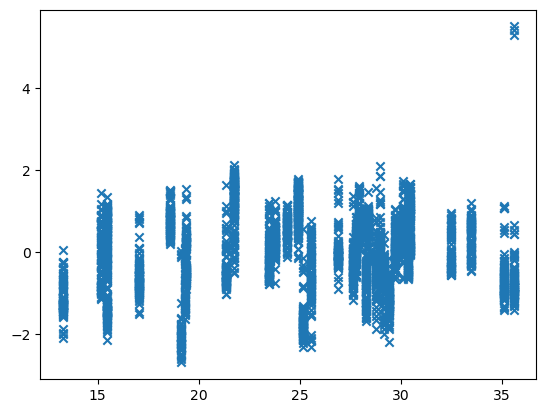

In [51]:
plt.scatter(data['BuAli_max'],data['temperature'],marker='x')

In [44]:
stats_df.T

BuAdj_spearman  BuAdj_spearman_p_value  BuAdj_pearson  BuAdj_r_squared  \
0       -0.696803                     0.0      -0.670675         0.449805   

   BuAdj_rmse  BuAdj_cooks_d  BuAdj_mutual_info  BuIBD_spearman  \
0    0.653329       0.020906           0.658575       -0.544965   

   BuIBD_spearman_p_value  BuIBD_pearson  ...  SVF_3D_median_rmse  \
0           1.353936e-238      -0.489366  ...            0.745775   

   SVF_3D_median_cooks_d  SVF_3D_median_mutual_info  SVF_3D_IQR_spearman  \
0               0.009557                   0.738713             0.642744   

   SVF_3D_IQR_spearman_p_value  SVF_3D_IQR_pearson  SVF_3D_IQR_r_squared  \
0                          0.0            0.626234              0.392169   

   SVF_3D_IQR_rmse  SVF_3D_IQR_cooks_d  SVF_3D_IQR_mutual_info  
0         0.718201            0.009962                 0.67923  

[1 rows x 10192 columns]

In [30]:
pd.DataFrame(hin,columns=['heat_island_nights']).to_csv('/Users/lisawink/Documents/paper1/data/hin.csv')

### Heat Island Days defined as days with standard deviation greater than 2 and no precipitation on that day or day before

In [14]:
reload(vis)

<module 'laptop.vis' from '/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py'>

Pearson ρ: 0.60
$r^2$: 0.364
RMSE: 0.725
Spearman ρ: 0.60
Spearman p-val: 0.00
Mutual Info: 0.705
Pearson ρ: 0.62
$r^2$: 0.386
RMSE: 0.712
Spearman ρ: 0.64
Spearman p-val: 0.00
Mutual Info: 0.707
Pearson ρ: 0.64
$r^2$: 0.409
RMSE: 0.699
Spearman ρ: 0.64
Spearman p-val: 0.00
Mutual Info: 0.713
Pearson ρ: -0.49
$r^2$: 0.239
RMSE: 0.768
Spearman ρ: -0.54
Spearman p-val: 0.00
Mutual Info: 0.580
Pearson ρ: -0.67
$r^2$: 0.450
RMSE: 0.653
Spearman ρ: -0.70
Spearman p-val: 0.00
Mutual Info: 0.661
Pearson ρ: 0.53
$r^2$: 0.277
RMSE: 0.773
Spearman ρ: 0.60
Spearman p-val: 0.00
Mutual Info: 0.750
Pearson ρ: 0.61
$r^2$: 0.369
RMSE: 0.722
Spearman ρ: 0.68
Spearman p-val: 0.00
Mutual Info: 0.749
Pearson ρ: 0.66
$r^2$: 0.438
RMSE: 0.647
Spearman ρ: 0.70
Spearman p-val: 0.00
Mutual Info: 0.765
Pearson ρ: -0.62
$r^2$: 0.387
RMSE: 0.721
Spearman ρ: -0.61
Spearman p-val: 0.00
Mutual Info: 0.730
Pearson ρ: -0.44
$r^2$: 0.191
RMSE: 0.817
Spearman ρ: -0.40
Spearman p-val: 0.00
Mutual Info: 0.743
Pearson ρ: -

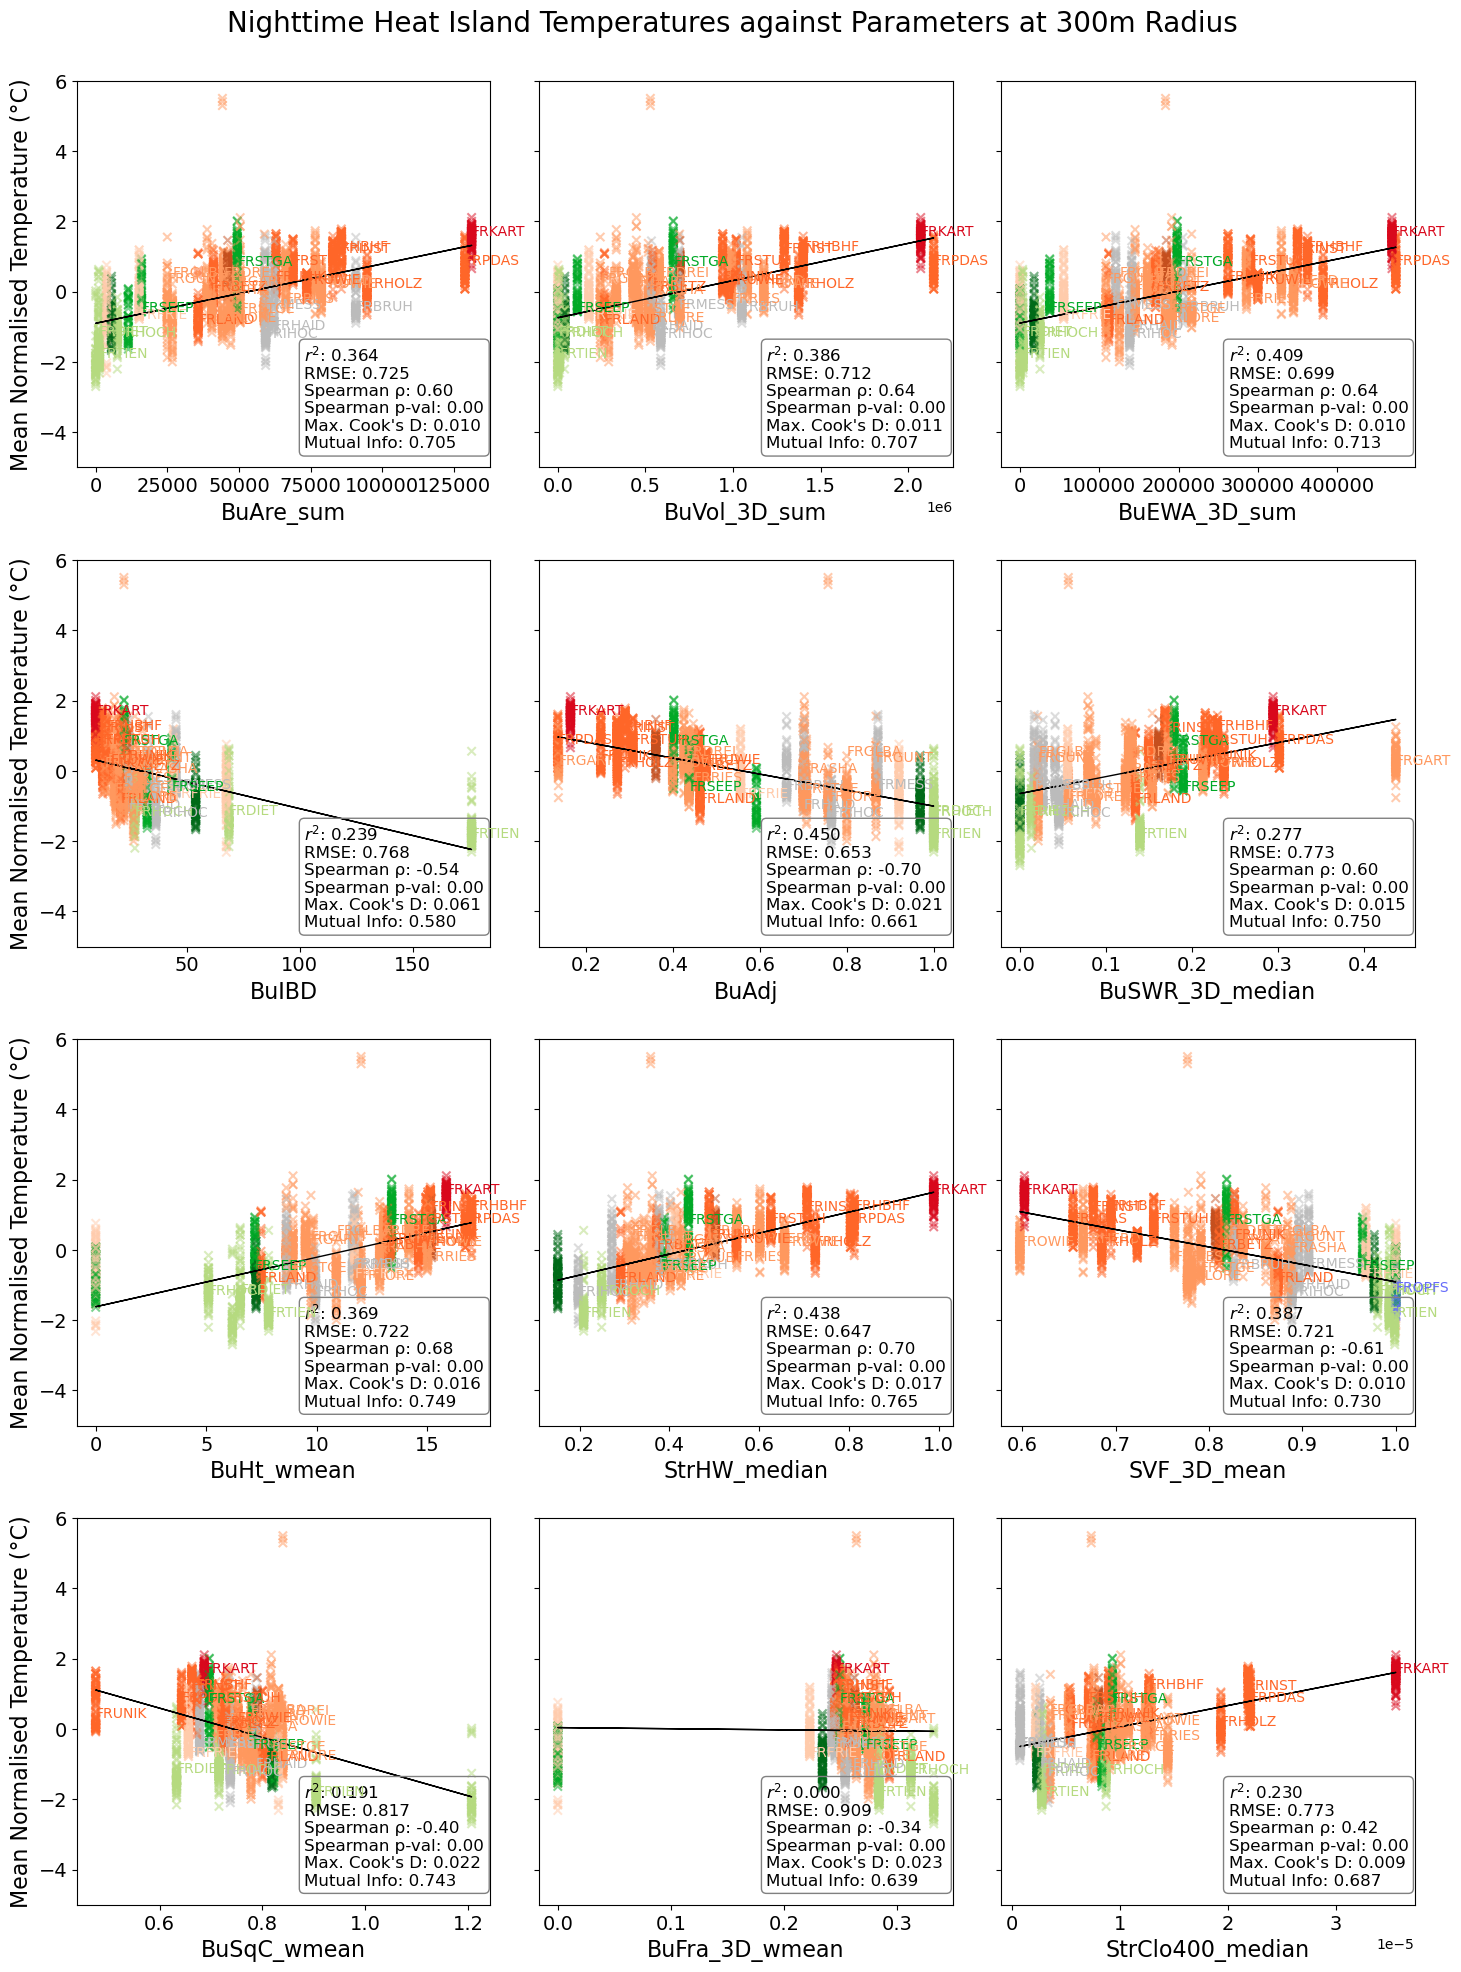

In [15]:
# mean normalisation

# make 3 by 4 plot with the following parameters
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuSqC_wmean','BuFra_3D_wmean', 'StrClo400_median']

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Nighttime Heat Island Temperatures against Parameters at 300m Radius', fontsize=20, y=0.99)
#fig.subplots_adjust(wspace=0.1)
for i, ax in enumerate(axs.flat):
    vis.simple_plot(ax, 300, params[i], hin)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_ylabel("Mean Normalised Temperature (°C)", fontsize=16)
    ax.set_ylim(-5,6)

    if i % 3 != 0:  # 1st column (index 0, 3, 6, ...) keeps labels
        ax.set_ylabel("")  # Remove y-axis label
        ax.yaxis.set_ticklabels([])  # Remove y-axis ticks
        
plt.tight_layout(pad = 2, w_pad=0.01)
plt.savefig('hin_vs_params_300m_sd.png')
plt.savefig('hin_vs_params_300m_sd.pdf')
plt.show()

In [44]:
reload(vis)

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:92: SyntaxWarning: invalid escape sequence '\d'
  df['LCZ_number'] = df['LCZ'].str.extract('(\d+)').astype(int)


<module 'laptop.vis' from '/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py'>

Pearson ρ: 0.60
$r^2$: 0.364
RMSE: 0.725
Spearman ρ: 0.60
Spearman p-val: 0.00
Mutual Info: 0.703
Pearson ρ: 0.62
$r^2$: 0.386
RMSE: 0.712
Spearman ρ: 0.64
Spearman p-val: 0.00
Mutual Info: 0.706
Pearson ρ: 0.64
$r^2$: 0.409
RMSE: 0.699
Spearman ρ: 0.64
Spearman p-val: 0.00
Mutual Info: 0.713
Pearson ρ: -0.49
$r^2$: 0.239
RMSE: 0.768
Spearman ρ: -0.54
Spearman p-val: 0.00
Mutual Info: 0.581
Pearson ρ: -0.67
$r^2$: 0.450
RMSE: 0.653
Spearman ρ: -0.70
Spearman p-val: 0.00
Mutual Info: 0.661
Pearson ρ: 0.53
$r^2$: 0.277
RMSE: 0.773
Spearman ρ: 0.60
Spearman p-val: 0.00
Mutual Info: 0.751
Pearson ρ: 0.61
$r^2$: 0.369
RMSE: 0.722
Spearman ρ: 0.68
Spearman p-val: 0.00
Mutual Info: 0.748
Pearson ρ: 0.66
$r^2$: 0.438
RMSE: 0.647
Spearman ρ: 0.70
Spearman p-val: 0.00
Mutual Info: 0.767
Pearson ρ: -0.62
$r^2$: 0.387
RMSE: 0.721
Spearman ρ: -0.61
Spearman p-val: 0.00
Mutual Info: 0.732
Pearson ρ: -0.38
$r^2$: 0.147
RMSE: 0.839
Spearman ρ: -0.39
Spearman p-val: 0.00
Mutual Info: 0.714
Pearson ρ: 0

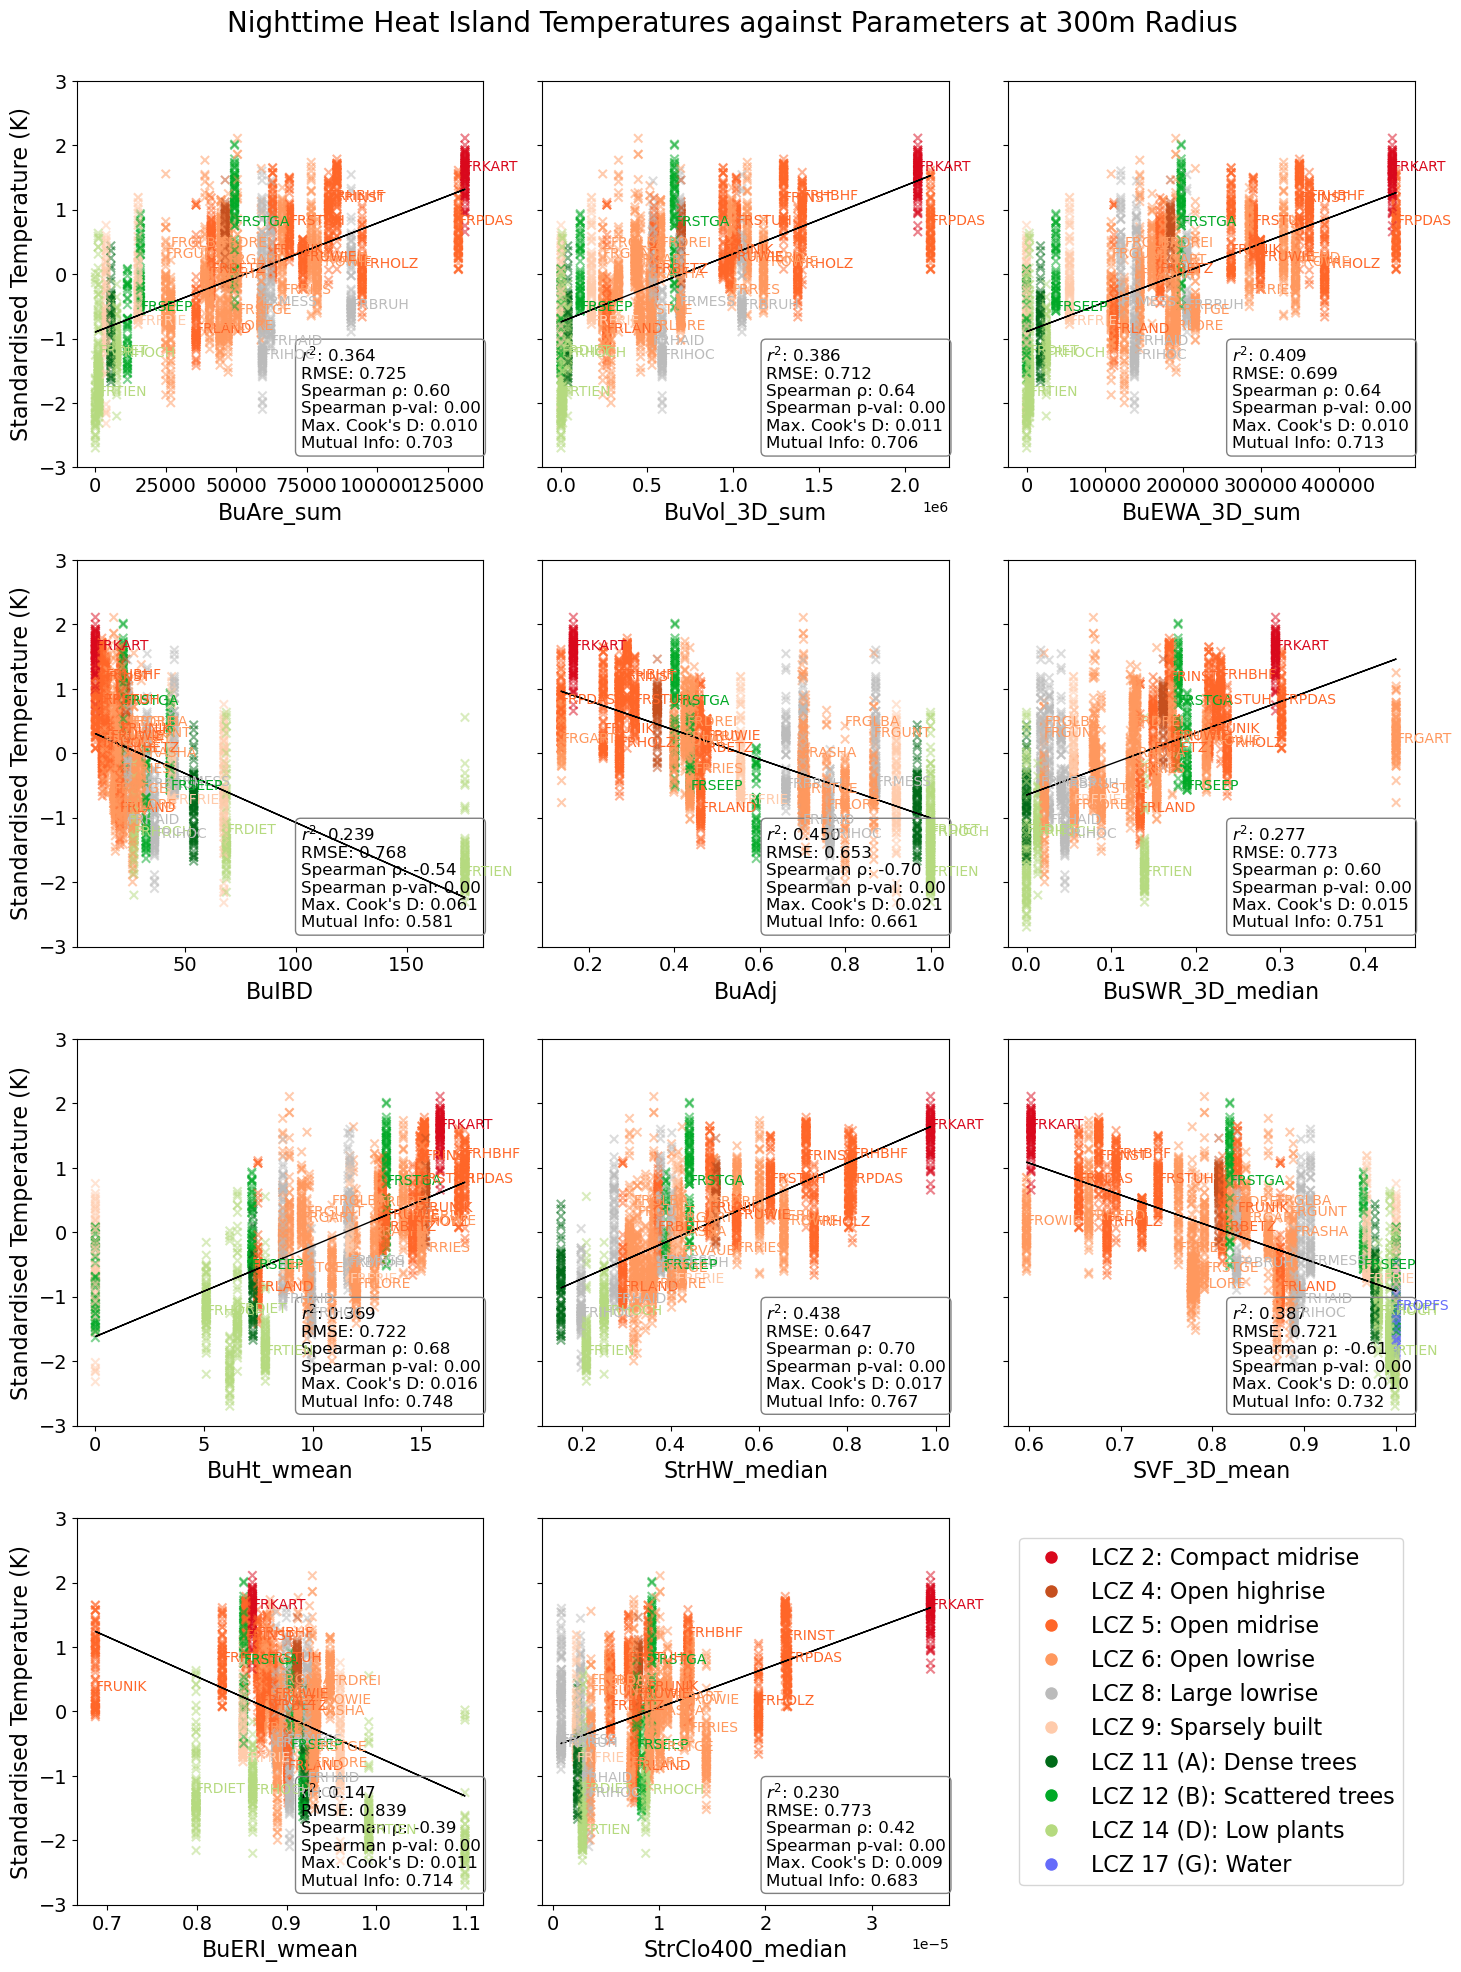

In [13]:
# mean/std normalisation

# make 3 by 4 plot with the following parameters
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_wmean', 'StrClo400_median']

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Nighttime Heat Island Temperatures against Parameters at 300m Radius', fontsize=20, y=0.99)
#fig.subplots_adjust(wspace=0.1)
for i, ax in enumerate(axs.flat):
    if i in range(0,11):
        vis.simple_plot(ax, 300, params[i], hin)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_ylabel("Standardised Temperature (K)", fontsize=16)
        ax.set_ylim(-3,3)

        if i % 3 != 0:  # 1st column (index 0, 3, 6, ...) keeps labels
            ax.set_ylabel("")  # Remove y-axis label
            ax.yaxis.set_ticklabels([])  # Remove y-axis ticks
    else:
        legend_elements = vis.custom_lcz_legend()
        ax.legend(handles=legend_elements, loc='center', fontsize=16)
        ax.set_axis_off()
  
plt.tight_layout(pad = 2, w_pad=0.01)
plt.savefig('hin_vs_params_300m_sd.png')
plt.savefig('hin_vs_params_300m_sd.pdf')
plt.show()

In [14]:
# for spider plot values

In [21]:
vars_2 = ['BuAre_median','BuVol_3D_median','BuEWA_3D_median','BuSWR_median','BuHt_wmean','BuHt_max','StrHW_mean','SVF_3D_mean','BuERI_mode']

In [22]:
for i in vars_2:
    print(i)
    vis.simple_plot(ax, 300, i, hin)

BuAre_median
Pearson ρ: 0.09
$r^2$: 0.009
RMSE: 0.905
Spearman ρ: 0.32
Spearman p-val: 0.00
Mutual Info: 0.643
Max Cook's d: 0.006
BuVol_3D_median
Pearson ρ: 0.30
$r^2$: 0.092
RMSE: 0.866
Spearman ρ: 0.34
Spearman p-val: 0.00
Mutual Info: 0.686
Max Cook's d: 0.007
BuEWA_3D_median
Pearson ρ: 0.18
$r^2$: 0.033
RMSE: 0.894
Spearman ρ: 0.23
Spearman p-val: 0.00
Mutual Info: 0.702
Max Cook's d: 0.006
BuSWR_median
Pearson ρ: 0.57
$r^2$: 0.327
RMSE: 0.746
Spearman ρ: 0.62
Spearman p-val: 0.00
Mutual Info: 0.515
Max Cook's d: 0.021
BuHt_wmean
Pearson ρ: 0.61
$r^2$: 0.369
RMSE: 0.722
Spearman ρ: 0.68
Spearman p-val: 0.00
Mutual Info: 0.748
Max Cook's d: 0.016
BuHt_max
Pearson ρ: 0.54
$r^2$: 0.294
RMSE: 0.764
Spearman ρ: 0.55
Spearman p-val: 0.00
Mutual Info: 0.700
Max Cook's d: 0.015
StrHW_mean
Pearson ρ: 0.65
$r^2$: 0.422
RMSE: 0.656
Spearman ρ: 0.70
Spearman p-val: 0.00
Mutual Info: 0.724
Max Cook's d: 0.018
SVF_3D_mean
Pearson ρ: -0.62
$r^2$: 0.387
RMSE: 0.721
Spearman ρ: -0.61
Spearman p-va

[0.69516187]
Pearson ρ: 0.57
$r^2$: 0.324
RMSE: 0.728
Spearman ρ: 0.55
Spearman p-val: 0.00
Mutual Info: 0.695
[0.60982049]
Pearson ρ: 0.61
$r^2$: 0.372
RMSE: 0.701
Spearman ρ: 0.58
Spearman p-val: 0.00
Mutual Info: 0.610
[0.6071339]
Pearson ρ: 0.62
$r^2$: 0.386
RMSE: 0.693
Spearman ρ: 0.60
Spearman p-val: 0.00
Mutual Info: 0.607
[0.63401022]
Pearson ρ: -0.52
$r^2$: 0.271
RMSE: 0.736
Spearman ρ: -0.53
Spearman p-val: 0.00
Mutual Info: 0.634
[0.60907752]
Pearson ρ: -0.68
$r^2$: 0.462
RMSE: 0.633
Spearman ρ: -0.70
Spearman p-val: 0.00
Mutual Info: 0.609
[0.60127316]
Pearson ρ: 0.56
$r^2$: 0.308
RMSE: 0.748
Spearman ρ: 0.63
Spearman p-val: 0.00
Mutual Info: 0.601
[0.56240071]
Pearson ρ: 0.53
$r^2$: 0.283
RMSE: 0.749
Spearman ρ: 0.62
Spearman p-val: 0.00
Mutual Info: 0.562
[0.7809795]
Pearson ρ: 0.71
$r^2$: 0.502
RMSE: 0.604
Spearman ρ: 0.72
Spearman p-val: 0.00
Mutual Info: 0.781
[0.68253646]
Pearson ρ: -0.59
$r^2$: 0.354
RMSE: 0.727
Spearman ρ: -0.56
Spearman p-val: 0.00
Mutual Info: 0.6

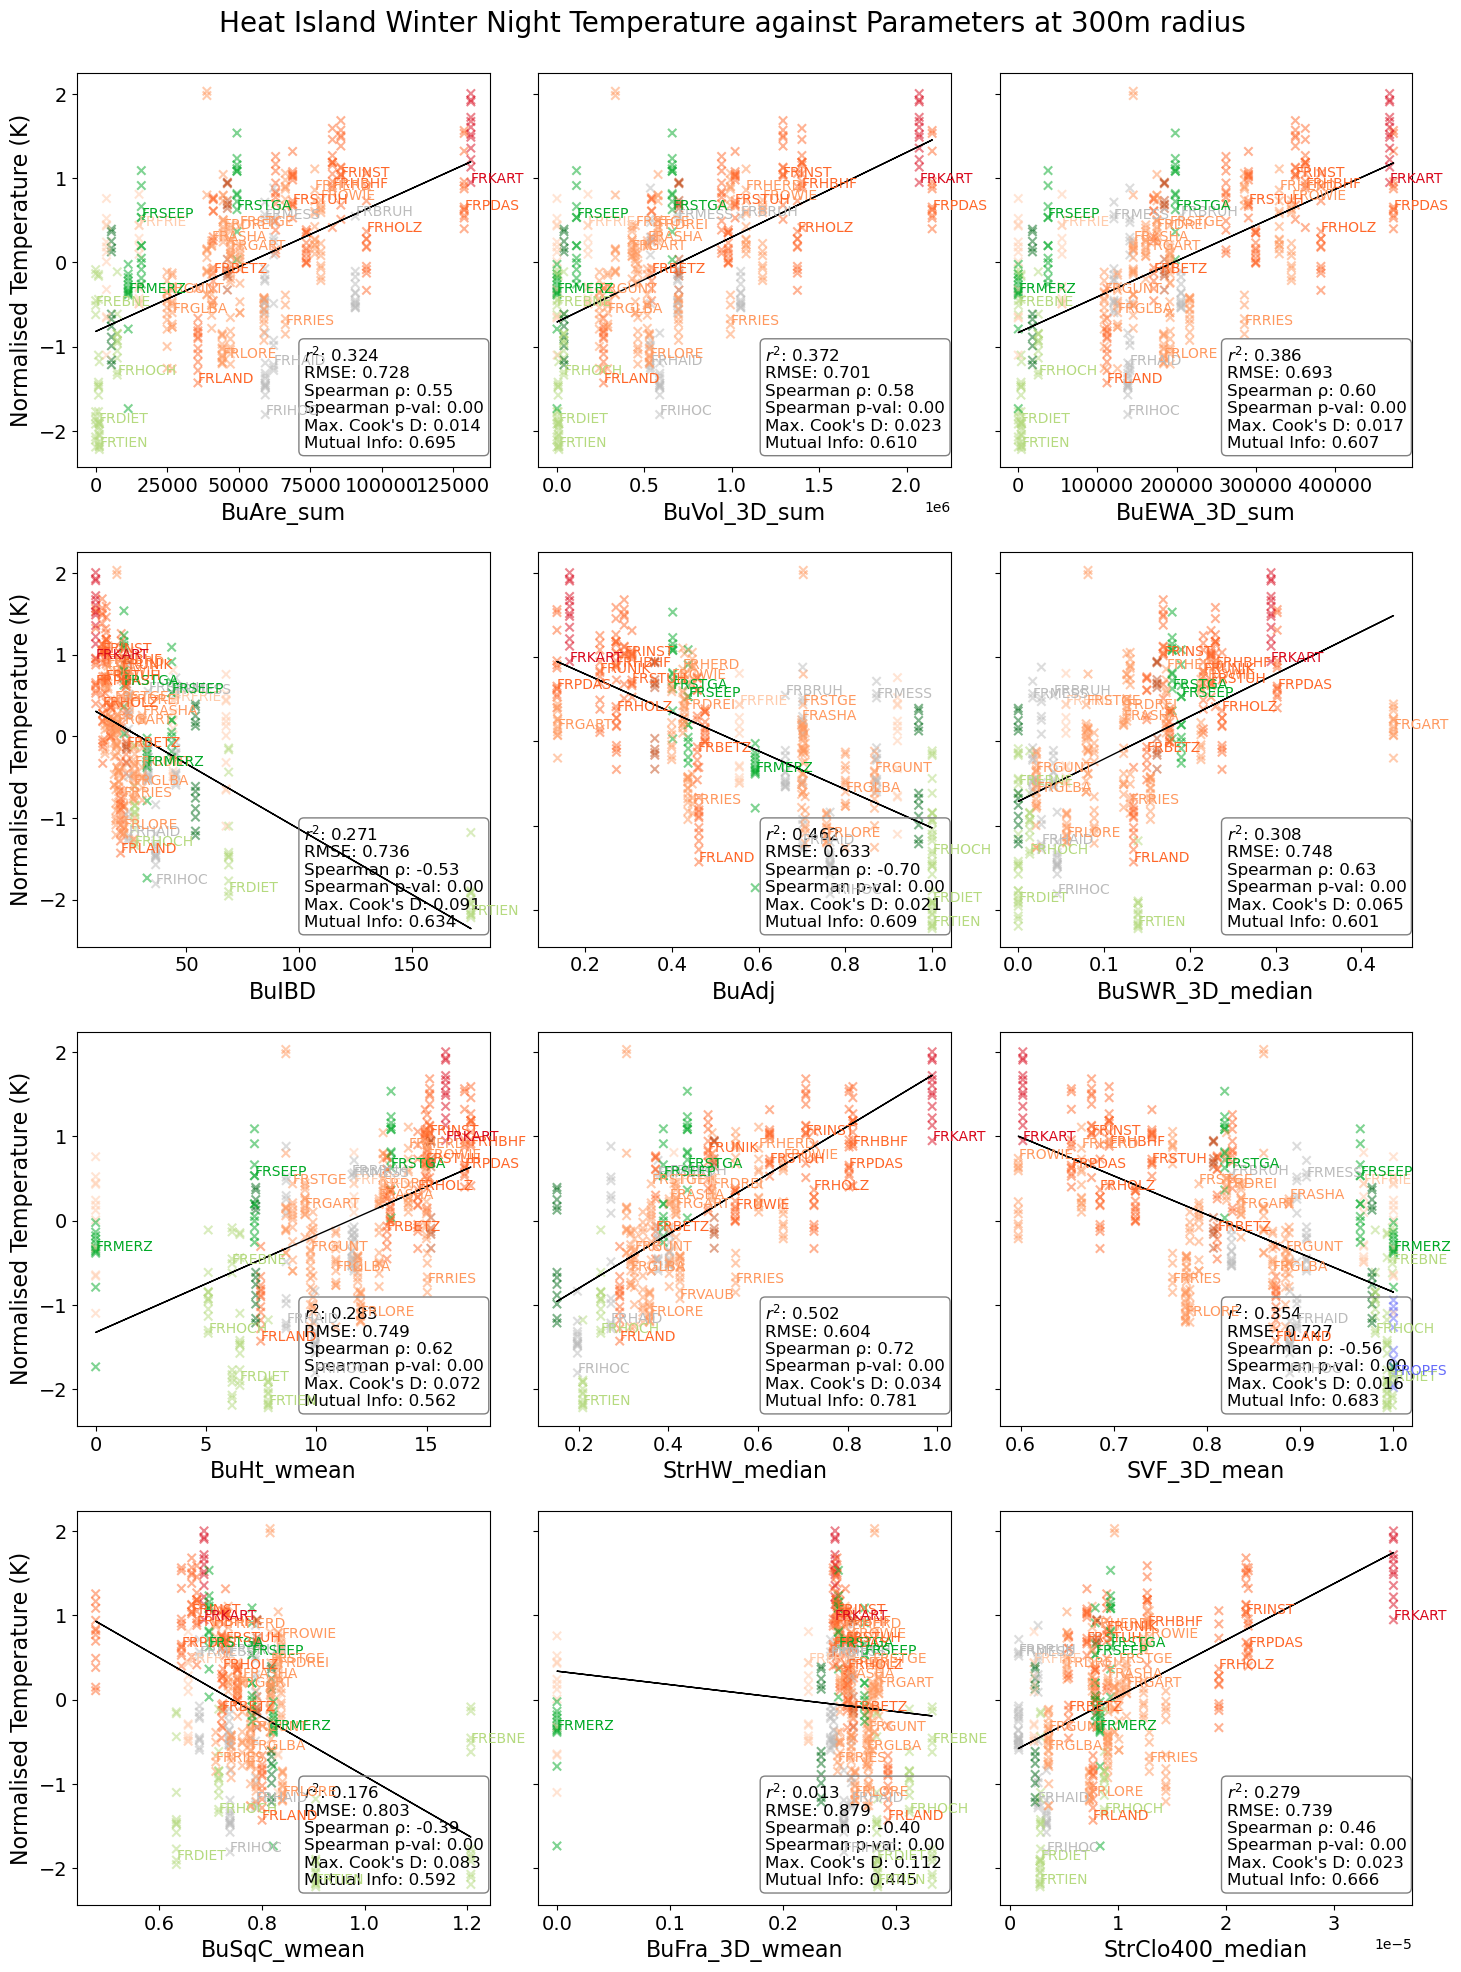

In [15]:
# make 3 by 4 plot with the following parameters
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuSqC_wmean','BuFra_3D_wmean', 'StrClo400_median']

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Heat Island Winter Night Temperature against Parameters at 300m radius', fontsize=20, y=0.99)
#fig.subplots_adjust(wspace=0.1)
for i, ax in enumerate(axs.flat):
    vis.simple_plot(ax, 300, params[i], hiwn)
    ax.tick_params(axis='both', which='major', labelsize=14)

    if i % 3 != 0:  # 1st column (index 0, 3, 6, ...) keeps labels
        ax.set_ylabel("")  # Remove y-axis label
        ax.yaxis.set_ticklabels([])  # Remove y-axis ticks
        
plt.tight_layout(pad = 2, w_pad=0.01)

[0.90294579]
Pearson ρ: 0.66
$r^2$: 0.429
RMSE: 0.732
Spearman ρ: 0.65
Spearman p-val: 0.00
Mutual Info: 0.903
[0.87521753]
Pearson ρ: 0.64
$r^2$: 0.407
RMSE: 0.746
Spearman ρ: 0.67
Spearman p-val: 0.00
Mutual Info: 0.875
[0.866011]
Pearson ρ: 0.65
$r^2$: 0.423
RMSE: 0.736
Spearman ρ: 0.63
Spearman p-val: 0.00
Mutual Info: 0.866
[0.72100697]
Pearson ρ: -0.49
$r^2$: 0.239
RMSE: 0.793
Spearman ρ: -0.50
Spearman p-val: 0.00
Mutual Info: 0.721
[0.81191008]
Pearson ρ: -0.67
$r^2$: 0.447
RMSE: 0.676
Spearman ρ: -0.66
Spearman p-val: 0.00
Mutual Info: 0.812
[0.88052202]
Pearson ρ: 0.49
$r^2$: 0.238
RMSE: 0.836
Spearman ρ: 0.54
Spearman p-val: 0.00
Mutual Info: 0.881
[0.91923277]
Pearson ρ: 0.65
$r^2$: 0.417
RMSE: 0.739
Spearman ρ: 0.69
Spearman p-val: 0.00
Mutual Info: 0.919
[0.90230468]
Pearson ρ: 0.62
$r^2$: 0.384
RMSE: 0.681
Spearman ρ: 0.64
Spearman p-val: 0.00
Mutual Info: 0.902
[0.9529758]
Pearson ρ: -0.63
$r^2$: 0.392
RMSE: 0.765
Spearman ρ: -0.60
Spearman p-val: 0.00
Mutual Info: 0.95

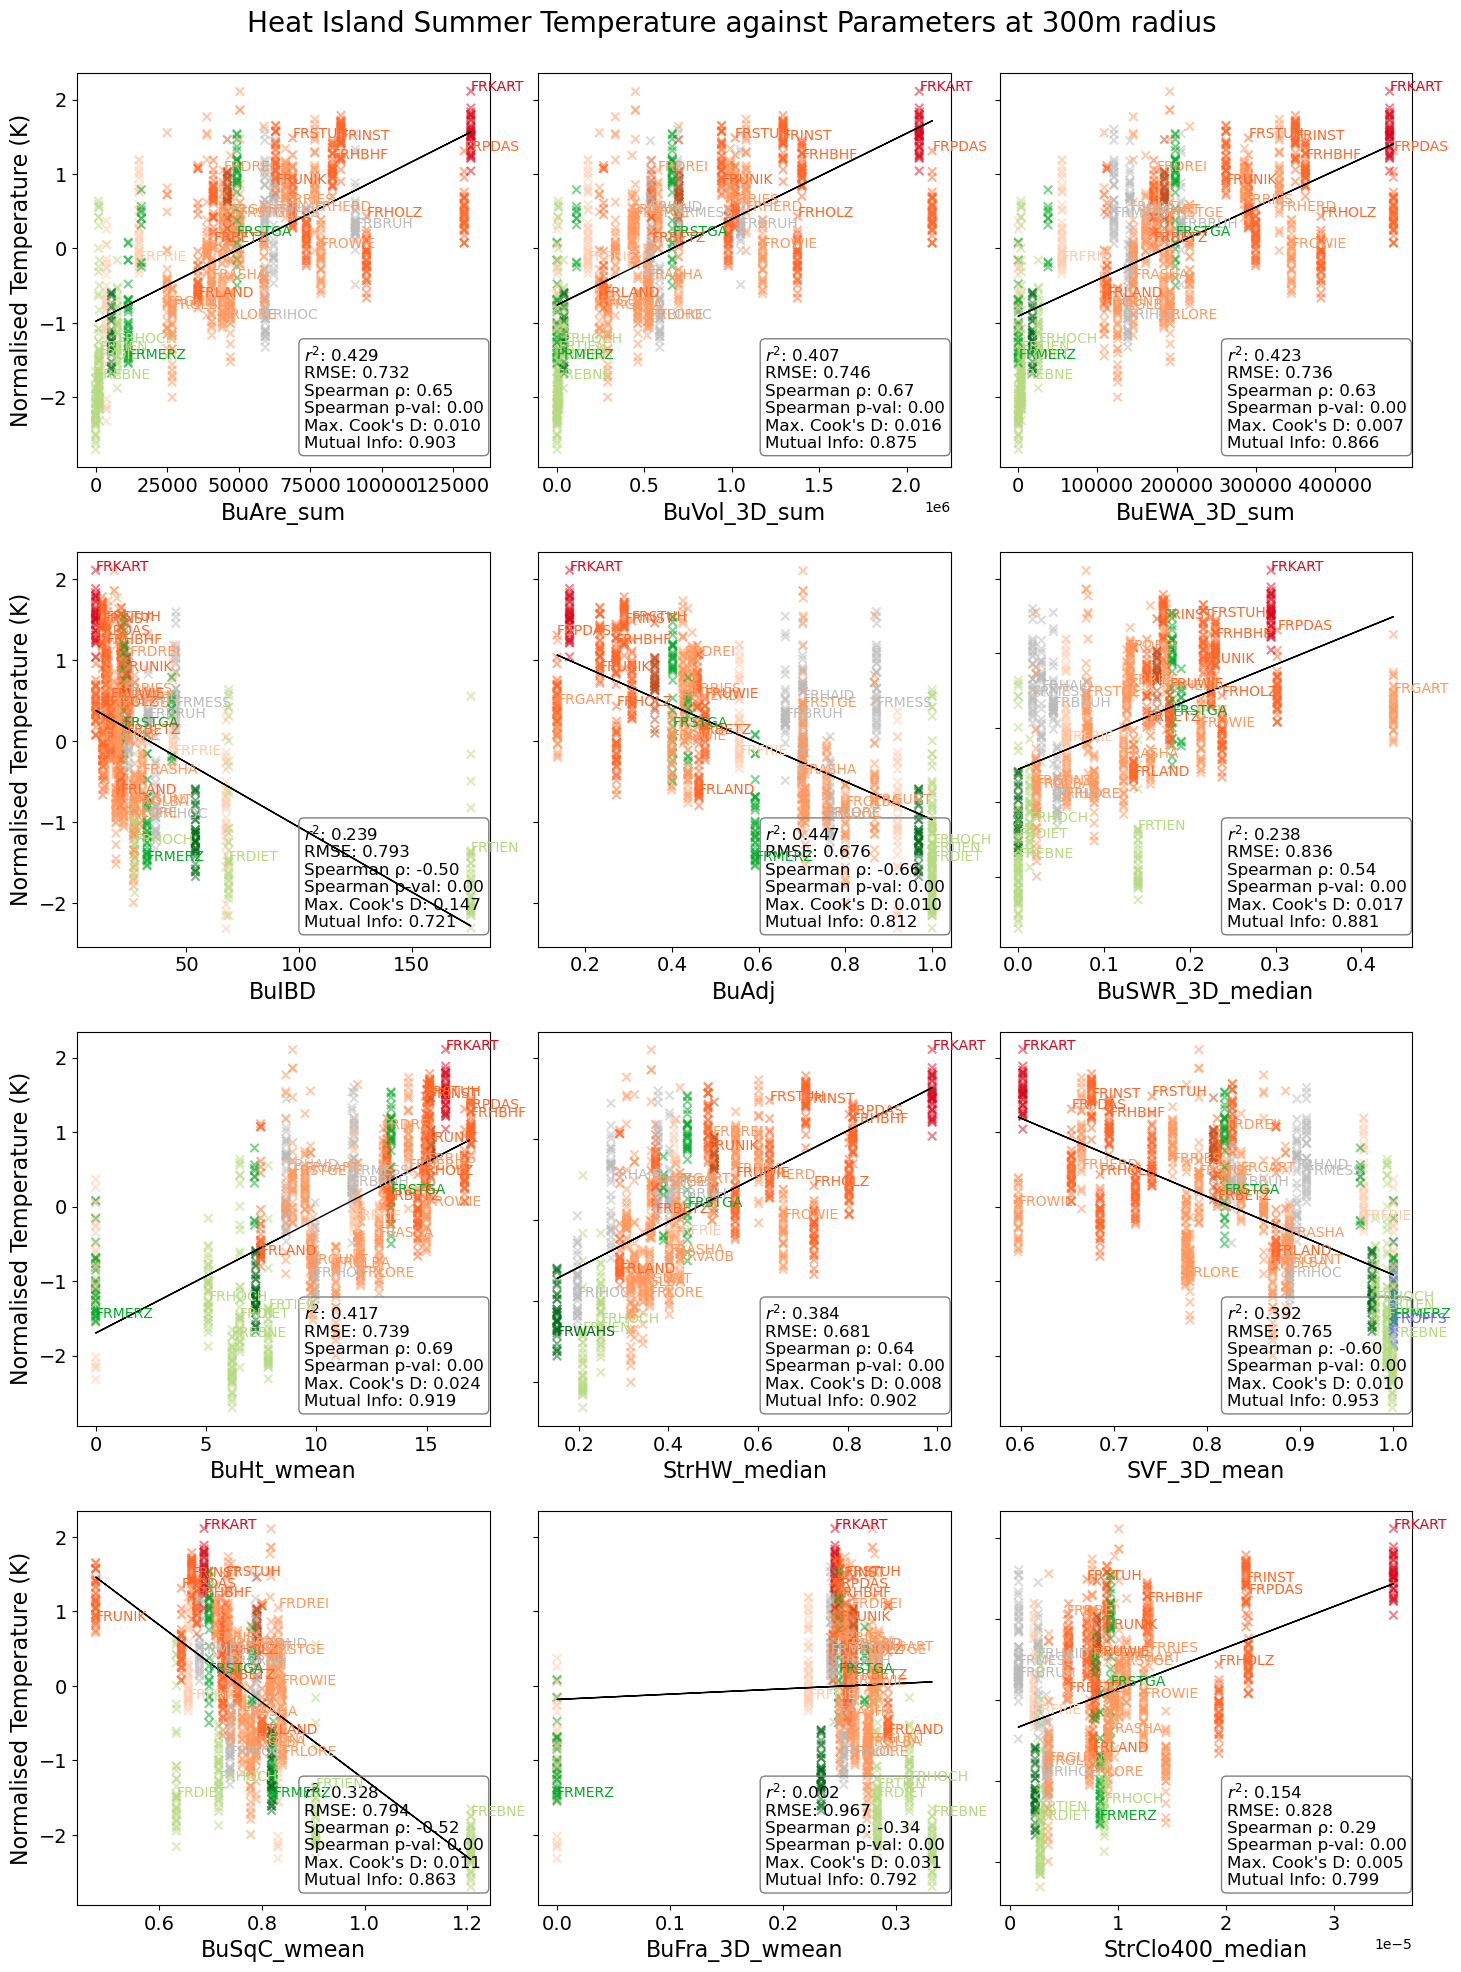

In [16]:
# make 3 by 4 plot with the following parameters
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuSqC_wmean','BuFra_3D_wmean', 'StrClo400_median']

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Heat Island Summer Temperature against Parameters at 300m radius', fontsize=20, y=0.99)
#fig.subplots_adjust(wspace=0.1)
for i, ax in enumerate(axs.flat):
    vis.simple_plot(ax, 300, params[i], hisn)
    ax.tick_params(axis='both', which='major', labelsize=14)

    if i % 3 != 0:  # 1st column (index 0, 3, 6, ...) keeps labels
        ax.set_ylabel("")  # Remove y-axis label
        ax.yaxis.set_ticklabels([])  # Remove y-axis ticks
        
plt.tight_layout(pad = 2, w_pad=0.01)

In [18]:
reload(vis)

/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py:92: SyntaxWarning: invalid escape sequence '\d'
  df['LCZ_number'] = df['LCZ'].str.extract('(\d+)').astype(int)


<module 'laptop.vis' from '/Users/lisawink/Documents/freiburg/laptop/../laptop/vis.py'>

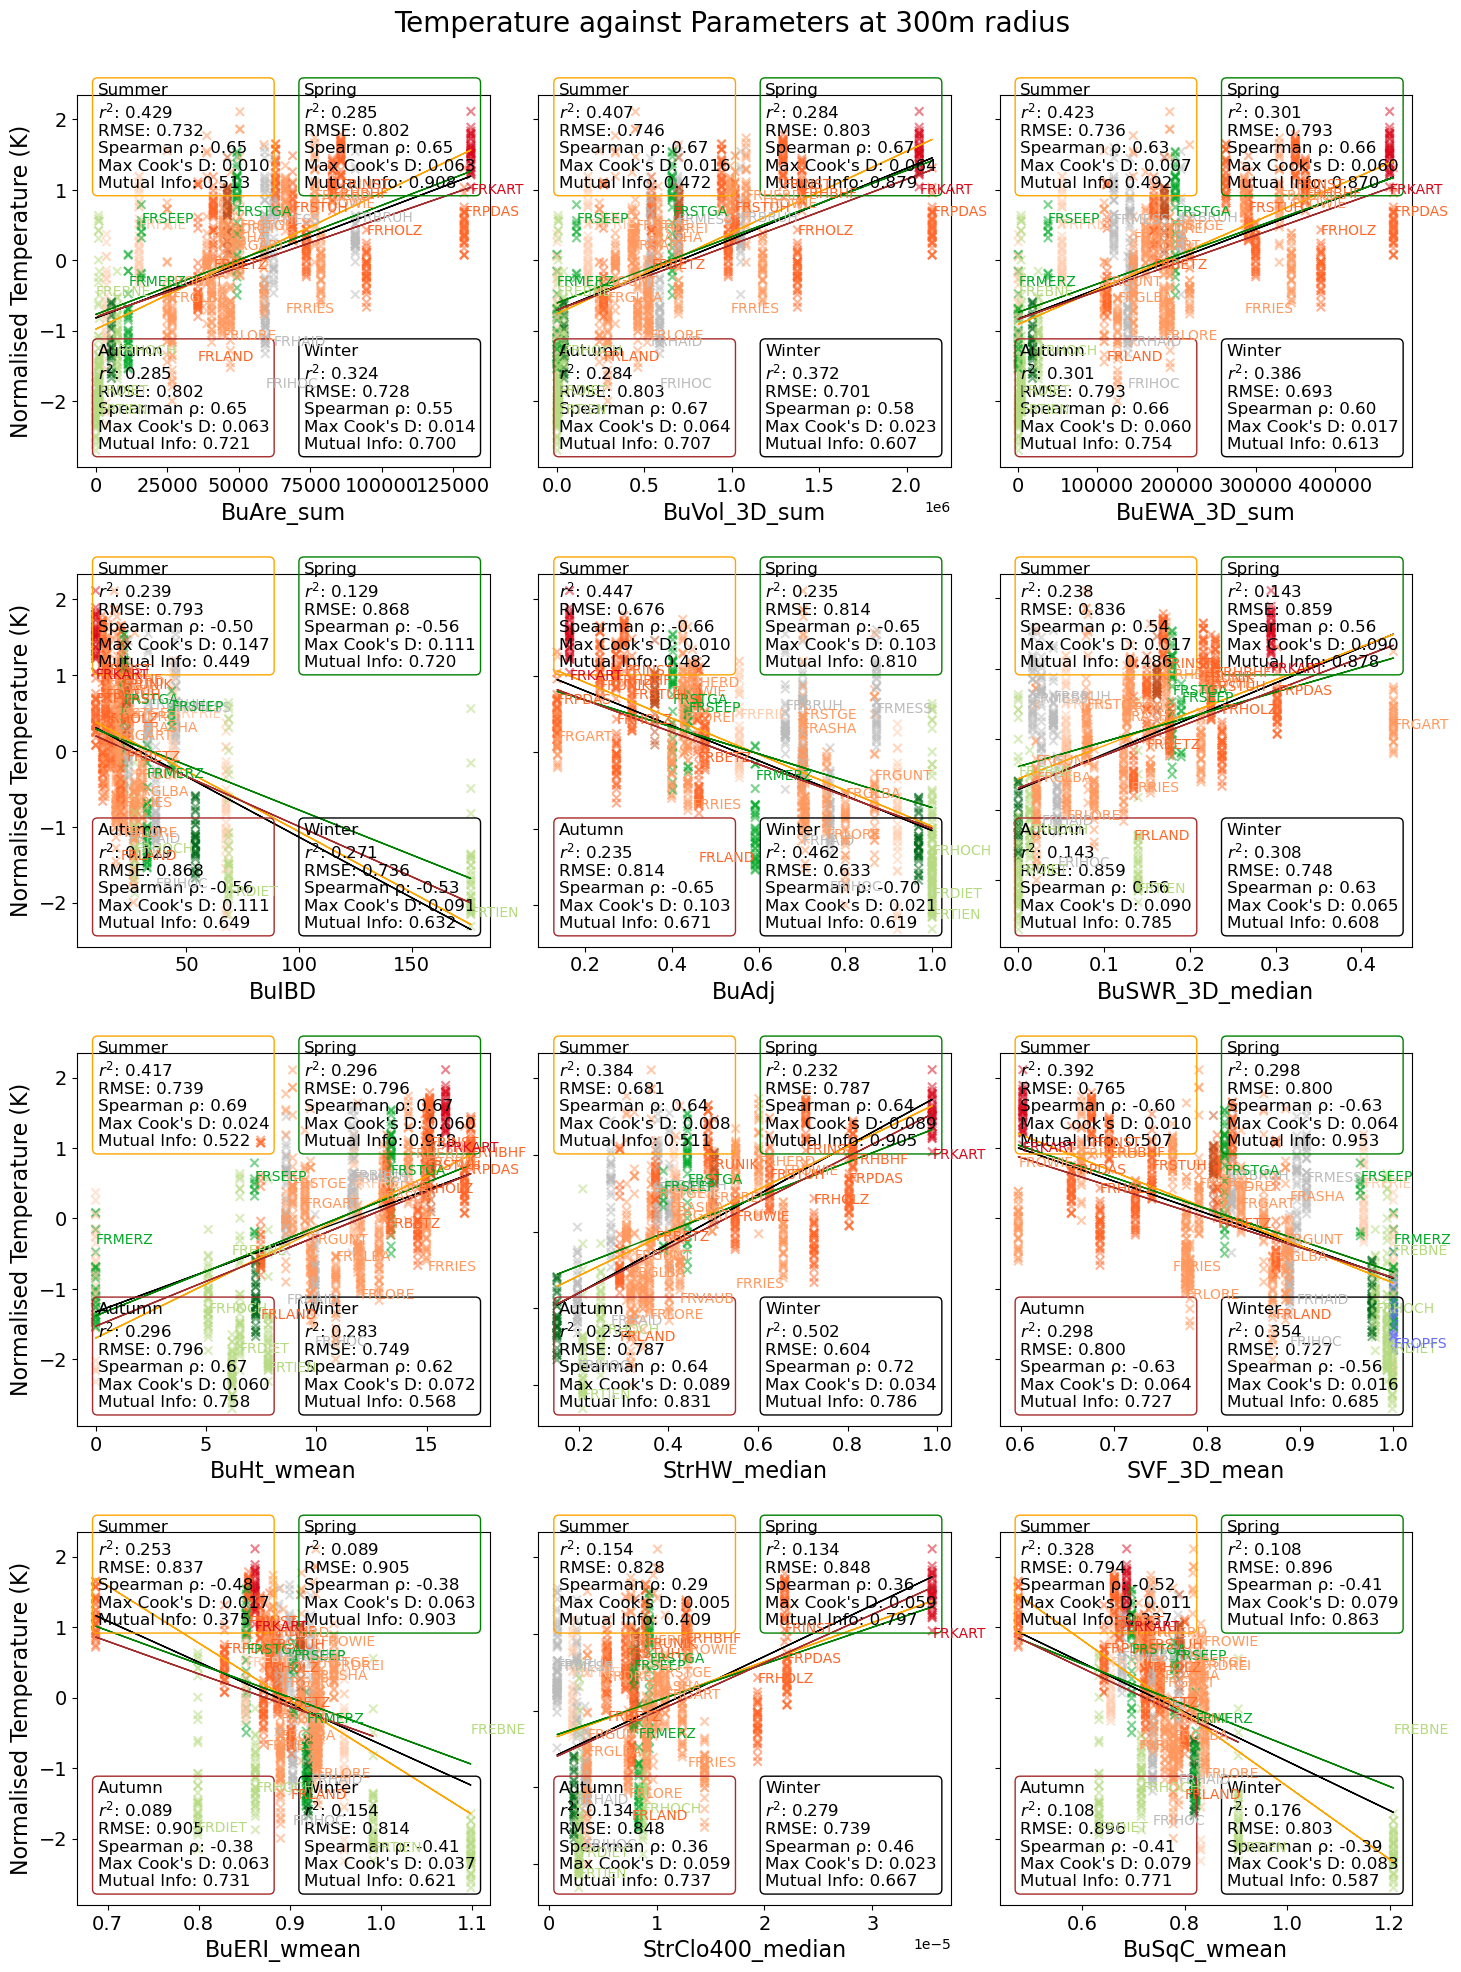

In [21]:
# make 3 by 4 plot with the following parameters
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_wmean', 'StrClo400_median', 'BuSqC_wmean']

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Temperature against Parameters at 300m radius', fontsize=20, y=0.99)
#fig.subplots_adjust(wspace=0.1)
for i, ax in enumerate(axs.flat):
    vis.plot_seasons(ax, 300, params[i], hiwn, hisp, hisn, hia)
    ax.tick_params(axis='both', which='major', labelsize=14)

    if i % 3 != 0:  # 1st column (index 0, 3, 6, ...) keeps labels
        ax.set_ylabel("")  # Remove y-axis label
        ax.yaxis.set_ticklabels([])  # Remove y-axis ticks
        
plt.tight_layout(pad = 2, w_pad=0.01)
plt.savefig('/Users/lisawink/Documents/paper1/figures/seasons_temp_vs_params_300m.png')
plt.savefig('/Users/lisawink/Documents/paper1/figures/seasons_temp_vs_params_300m.pdf')
plt.show()